In [ ]:
#22010310081 Zeynep Yılmaz Şeker Bartın Üniversitesi Bilgisayar Mühendisliği

In [1]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sentence_transformers import SentenceTransformer

/Users/zeynepyilmaz/Documents/NLP/anlp/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)


In [3]:
# Read sentences from Excel file
file_path = "sentenceSets.xlsx"  
df = pd.read_excel(file_path)

In [4]:
# Function to get CLS token embedding
def get_cls_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", max_length=128, truncation=True, padding="max_length")
    outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()  # Extract CLS token
    return cls_embedding

In [5]:

results = []


for index, row in df.iterrows():
    sentence_1 = row["Sentence 1"]
    sentence_2 = row["Sentence 2"]
    sentence_3 = row["Sentence 3"]
    
    # Get embeddings
    embedding_1 = get_cls_embedding(sentence_1)
    embedding_2 = get_cls_embedding(sentence_2)
    embedding_3 = get_cls_embedding(sentence_3)
    
    # Compute cosine similarities
    similarity_1_2 = cosine_similarity(embedding_1, embedding_2)[0][0]
    similarity_1_3 = cosine_similarity(embedding_1, embedding_3)[0][0]
    similarity_2_3 = cosine_similarity(embedding_2, embedding_3)[0][0]
    
    # Append results
    results.append({
        "Sentence 1": sentence_1,
        "Sentence 2": sentence_2,
        "Sentence 3": sentence_3,
        "Similarity (S1, S2)": similarity_1_2,
        "Similarity (S1, S3)": similarity_1_3,
        "Similarity (S2, S3)": similarity_2_3,
    })

In [6]:

df_results = pd.DataFrame(results)
df_results.to_excel("clsToken_similarity_results.xlsx", index=False)

In [7]:

for i in range(50):
    print(df_results.iloc[i])
    print("-----")


Sentence 1                         The sky is clear and blue today.
Sentence 2             It’s the perfect weather for a morning walk.
Sentence 3                            My computer isn’t turning on.
Similarity (S1, S2)                                        0.927129
Similarity (S1, S3)                                        0.888607
Similarity (S2, S3)                                        0.882036
Name: 0, dtype: object
-----
Sentence 1                 The dog is playing in the garden.
Sentence 2                     It loves chasing butterflies.
Sentence 3             The bus was delayed for half an hour.
Similarity (S1, S2)                                 0.778339
Similarity (S1, S3)                                 0.804891
Similarity (S2, S3)                                 0.855838
Name: 1, dtype: object
-----
Sentence 1                      She is reading a mystery novel.
Sentence 2             The plot twists are keeping her engaged.
Sentence 3             The microwave sto

In [8]:
# Function to get mean-pooled embedding
def get_pooled_embedding(sentence):
    # Tokenize and encode
    inputs = tokenizer(sentence, return_tensors="pt", max_length=128, truncation=True, padding="max_length")
    outputs = model(**inputs)
    
    # Get last hidden states (all token embeddings)
    token_embeddings = outputs.last_hidden_state  # Shape: [batch_size, seq_len, hidden_dim]
    
    # Compute mean pooling (average over the sequence length)
    pooled_embedding = torch.mean(token_embeddings, dim=1).detach().numpy()  # Shape: [batch_size, hidden_dim]
    
    return pooled_embedding


results = []
for index, row in df.iterrows():
    sentence_1 = row["Sentence 1"]
    sentence_2 = row["Sentence 2"]
    sentence_3 = row["Sentence 3"]
    
    # Compute embeddings
    embedding_1 = get_pooled_embedding(sentence_1)
    embedding_2 = get_pooled_embedding(sentence_2)
    embedding_3 = get_pooled_embedding(sentence_3)
    
    # Compute cosine similarities
    similarity_1_2 = cosine_similarity(embedding_1, embedding_2)[0][0]
    similarity_1_3 = cosine_similarity(embedding_1, embedding_3)[0][0]
    similarity_2_3 = cosine_similarity(embedding_2, embedding_3)[0][0]
    
    # Append results
    results.append({
        "Sentence 1": sentence_1,
        "Sentence 2": sentence_2,
        "Sentence 3": sentence_3,
        "Similarity (S1, S2)": similarity_1_2,
        "Similarity (S1, S3)": similarity_1_3,
        "Similarity (S2, S3)": similarity_2_3,
    })


df_results = pd.DataFrame(results)


output_file_path = "pooled_embeddings_similarity_results.xlsx"
df_results.to_excel(output_file_path, index=False)



for i in range(50):
    print(df_results.iloc[i])
    print("-----")


Sentence 1                         The sky is clear and blue today.
Sentence 2             It’s the perfect weather for a morning walk.
Sentence 3                            My computer isn’t turning on.
Similarity (S1, S2)                                        0.878304
Similarity (S1, S3)                                         0.76437
Similarity (S2, S3)                                        0.766169
Name: 0, dtype: object
-----
Sentence 1                 The dog is playing in the garden.
Sentence 2                     It loves chasing butterflies.
Sentence 3             The bus was delayed for half an hour.
Similarity (S1, S2)                                 0.768188
Similarity (S1, S3)                                 0.735595
Similarity (S2, S3)                                 0.692823
Name: 1, dtype: object
-----
Sentence 1                      She is reading a mystery novel.
Sentence 2             The plot twists are keeping her engaged.
Sentence 3             The microwave sto

In [9]:
# Load the pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MPNet-base-v2')

# Function to compute embeddings using Sentence-BERT
def get_sentence_embedding(sentence):
    return model.encode(sentence, convert_to_tensor=True)

# Function to convert a PyTorch tensor to a NumPy array
def tensor_to_numpy(tensor):
    return tensor.cpu().numpy()



results = []
for index, row in df.iterrows():
    sentence_1 = row["Sentence 1"]
    sentence_2 = row["Sentence 2"]
    sentence_3 = row["Sentence 3"]
    
    # Compute embeddings
    embedding_1 = get_sentence_embedding(sentence_1)
    embedding_2 = get_sentence_embedding(sentence_2)
    embedding_3 = get_sentence_embedding(sentence_3)
    
    # Convert embeddings to NumPy arrays
    embedding_1_numpy = tensor_to_numpy(embedding_1)
    embedding_2_numpy = tensor_to_numpy(embedding_2)
    embedding_3_numpy = tensor_to_numpy(embedding_3)
    
    # Compute cosine similarities
    similarity_1_2 = cosine_similarity([embedding_1_numpy], [embedding_2_numpy])[0][0]
    similarity_1_3 = cosine_similarity([embedding_1_numpy], [embedding_3_numpy])[0][0]
    similarity_2_3 = cosine_similarity([embedding_2_numpy], [embedding_3_numpy])[0][0]
    
    # Append results
    results.append({
        "Sentence 1": sentence_1,
        "Sentence 2": sentence_2,
        "Sentence 3": sentence_3,
        "Similarity (S1, S2)": similarity_1_2,
        "Similarity (S1, S3)": similarity_1_3,
        "Similarity (S2, S3)": similarity_2_3,
    })


df_results = pd.DataFrame(results)

output_file_path = "sentence_transformers_similarity_results.xlsx"
df_results.to_excel(output_file_path, index=False)


for i in range(50):
    print(df_results.iloc[i])
    print("-----")

Sentence 1                         The sky is clear and blue today.
Sentence 2             It’s the perfect weather for a morning walk.
Sentence 3                            My computer isn’t turning on.
Similarity (S1, S2)                                        0.588749
Similarity (S1, S3)                                        0.135261
Similarity (S2, S3)                                         0.07257
Name: 0, dtype: object
-----
Sentence 1                 The dog is playing in the garden.
Sentence 2                     It loves chasing butterflies.
Sentence 3             The bus was delayed for half an hour.
Similarity (S1, S2)                                 0.348454
Similarity (S1, S3)                                   0.0201
Similarity (S2, S3)                                 0.034027
Name: 1, dtype: object
-----
Sentence 1                      She is reading a mystery novel.
Sentence 2             The plot twists are keeping her engaged.
Sentence 3             The microwave sto

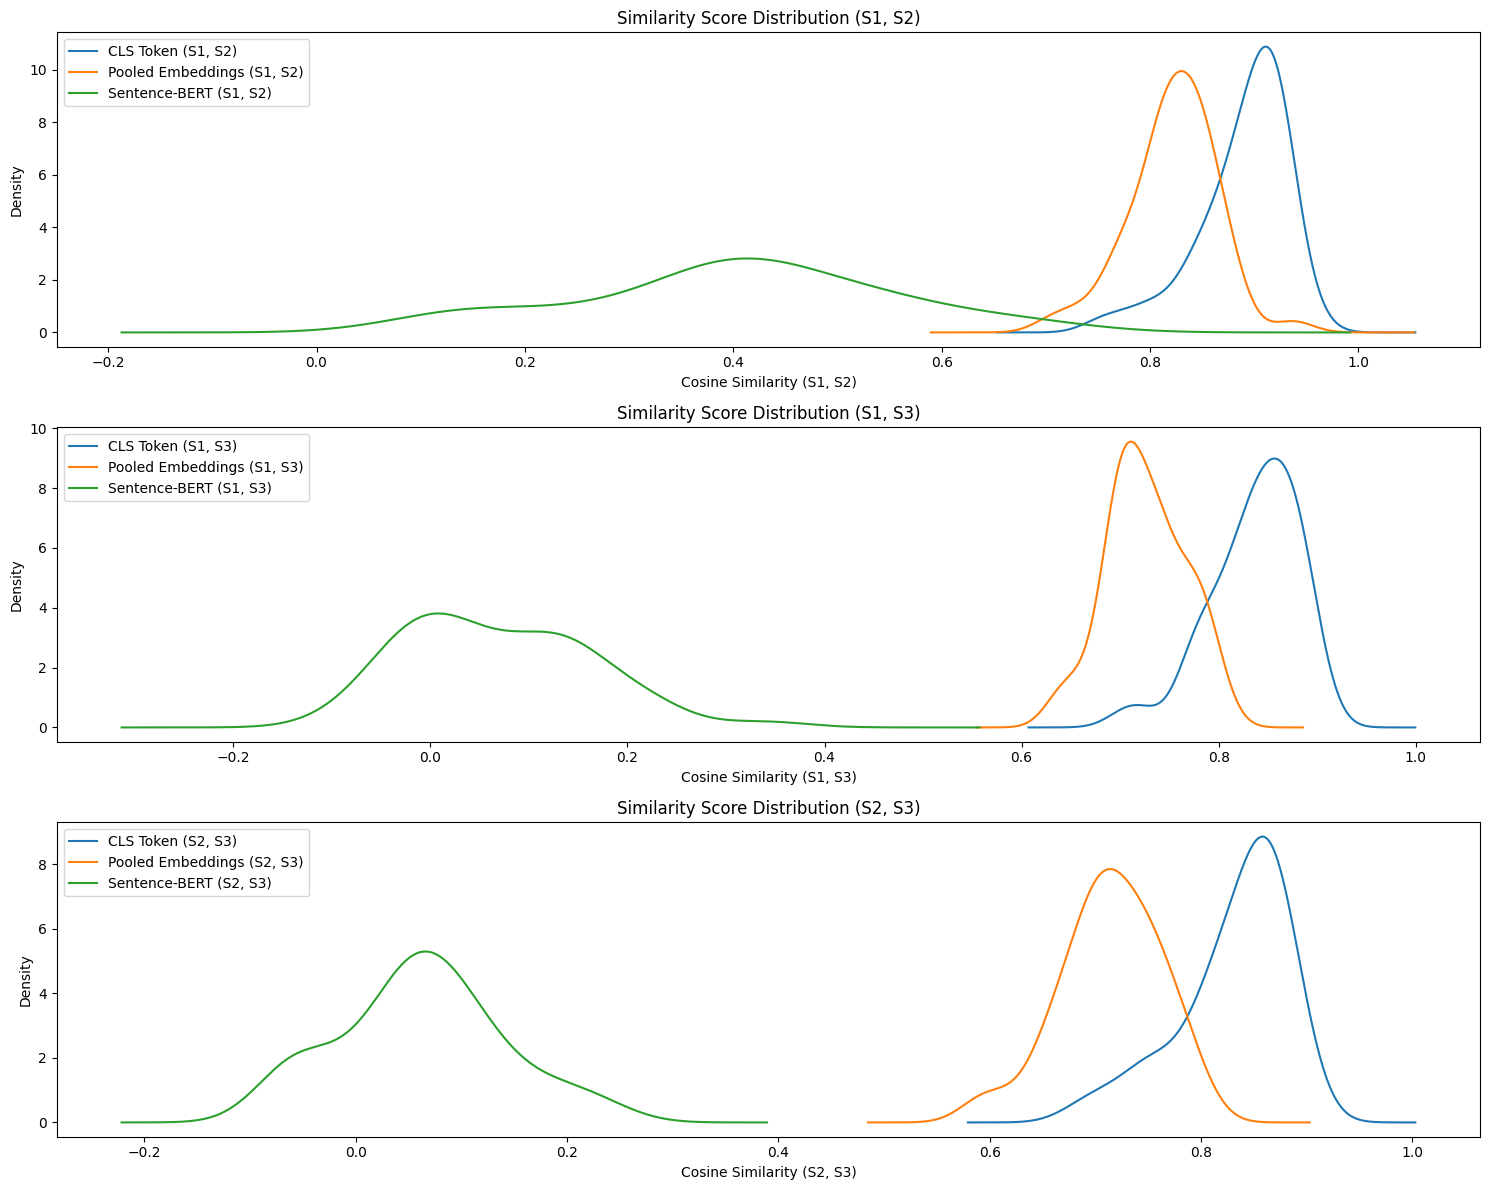

Ortalama ve Standart Sapmalar:
       CLS Token (S1, S2)  Pooled Embeddings (S1, S2)  Sentence-BERT (S1, S2)  \
count           50.000000                   50.000000               50.000000   
mean             0.889576                    0.822078                0.401249   
std              0.042247                    0.041434                0.146874   
min              0.753446                    0.705386                0.107677   
25%              0.871653                    0.802829                0.339760   
50%              0.901111                    0.824359                0.411424   
75%              0.921057                    0.847110                0.504390   
max              0.954179                    0.937222                0.697197   

       CLS Token (S1, S3)  Pooled Embeddings (S1, S3)  Sentence-BERT (S1, S3)  \
count           50.000000                   50.000000               50.000000   
mean             0.836863                    0.726057                0.069209

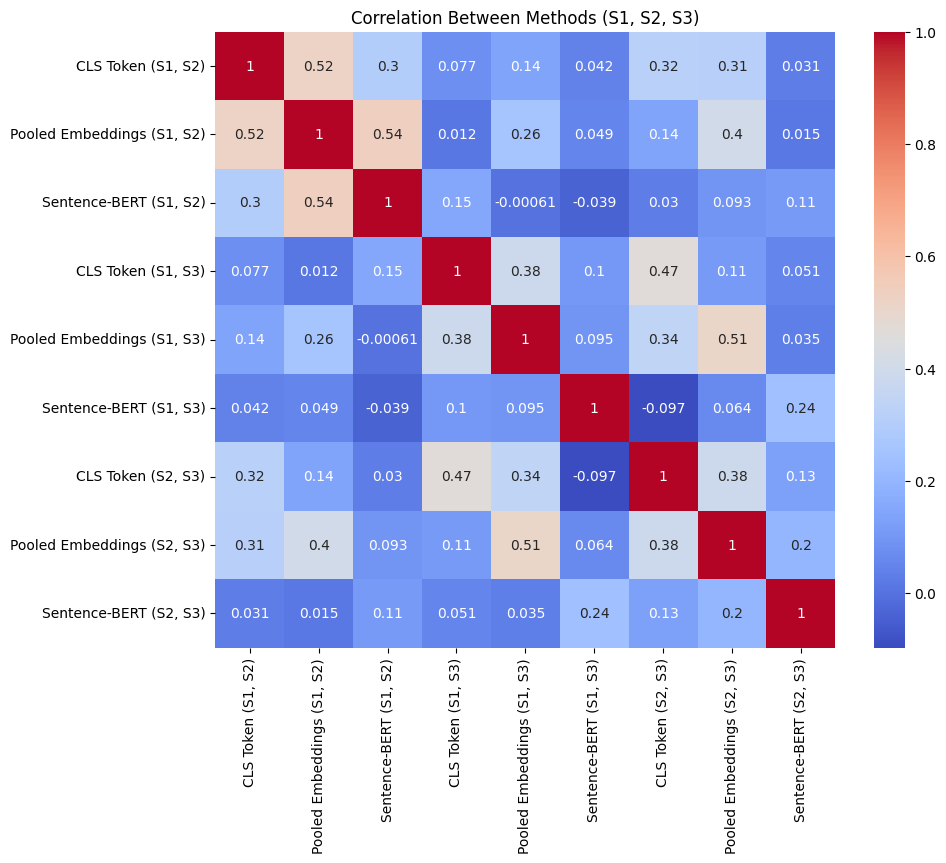

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns


cls_token_file = "clsToken_similarity_results.xlsx"
pooled_embeddings_file = "pooled_embeddings_similarity_results.xlsx"
sentence_bert_file = "sentence_transformers_similarity_results.xlsx"


cls_token_data = pd.read_excel(cls_token_file)
pooled_embeddings_data = pd.read_excel(pooled_embeddings_file)
sentence_bert_data = pd.read_excel(sentence_bert_file)

# İlgili sütunları birleştirme
results = pd.DataFrame({
    "CLS Token (S1, S2)": cls_token_data["Similarity (S1, S2)"],
    "Pooled Embeddings (S1, S2)": pooled_embeddings_data["Similarity (S1, S2)"],
    "Sentence-BERT (S1, S2)": sentence_bert_data["Similarity (S1, S2)"],
    "CLS Token (S1, S3)": cls_token_data["Similarity (S1, S3)"],
    "Pooled Embeddings (S1, S3)": pooled_embeddings_data["Similarity (S1, S3)"],
    "Sentence-BERT (S1, S3)": sentence_bert_data["Similarity (S1, S3)"],
    "CLS Token (S2, S3)": cls_token_data["Similarity (S2, S3)"],
    "Pooled Embeddings (S2, S3)": pooled_embeddings_data["Similarity (S2, S3)"],
    "Sentence-BERT (S2, S3)": sentence_bert_data["Similarity (S2, S3)"]
})

# 1. Skorların Dağılımını Görselleştirme
plt.figure(figsize=(15, 12))

# S1, S2 dağılımları
plt.subplot(3, 1, 1)
results["CLS Token (S1, S2)"].plot(kind="kde", label="CLS Token (S1, S2)")
results["Pooled Embeddings (S1, S2)"].plot(kind="kde", label="Pooled Embeddings (S1, S2)")
results["Sentence-BERT (S1, S2)"].plot(kind="kde", label="Sentence-BERT (S1, S2)")
plt.xlabel("Cosine Similarity (S1, S2)")
plt.title("Similarity Score Distribution (S1, S2)")
plt.legend()

# S1, S3 dağılımları
plt.subplot(3, 1, 2)
results["CLS Token (S1, S3)"].plot(kind="kde", label="CLS Token (S1, S3)")
results["Pooled Embeddings (S1, S3)"].plot(kind="kde", label="Pooled Embeddings (S1, S3)")
results["Sentence-BERT (S1, S3)"].plot(kind="kde", label="Sentence-BERT (S1, S3)")
plt.xlabel("Cosine Similarity (S1, S3)")
plt.title("Similarity Score Distribution (S1, S3)")
plt.legend()

# S2, S3 dağılımları
plt.subplot(3, 1, 3)
results["CLS Token (S2, S3)"].plot(kind="kde", label="CLS Token (S2, S3)")
results["Pooled Embeddings (S2, S3)"].plot(kind="kde", label="Pooled Embeddings (S2, S3)")
results["Sentence-BERT (S2, S3)"].plot(kind="kde", label="Sentence-BERT (S2, S3)")
plt.xlabel("Cosine Similarity (S2, S3)")
plt.title("Similarity Score Distribution (S2, S3)")
plt.legend()

plt.tight_layout()
plt.show()

# 2. Ortalamalar ve Standart Sapmalar
print("Ortalama ve Standart Sapmalar:")
print(results.describe())

# 3. Korelasyon Matrisi
correlation_matrix = results.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Between Methods (S1, S2, S3)")
plt.show()


In [ ]:
# Yukardaki sonuçlara göre CLS Token ve Pooled Embeddings daha yüksek ortalama değerlere sahip ve benzerlik skorlarında tutarlılar.
#Sentence-BERT'in ortalamaları daha düşük, çünkü bu yöntem daha bağlamsal çalıştığı için skor aralığı genişleyebilir.
#Sentence-BERT, bağlamsal farkları vurguladığı için, alakasız cümle çiftlerine çok düşük skorlar verebilir.